<a href="https://colab.research.google.com/github/dpcks/playdata/blob/main/08_Pandas%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA(Exploratory Data Analysis) 
- 탐색적 데이터 분석
- 데이터를 분석하고 결과를 도출하는 과정에 있어서 지속적으로 해당 데이터에 대한 탐색과 이해를 기본적으로 가져야 한다는 의미

## 데이터 종류
- 수치형 데이터
    - 연속형
        - 일정범위 안에서 어떤값도 취할 수 있는 실수(ex. 온도 , 키, 풍속, 운임료)
    - 이산형
        - 횟수 같은 정수형 데이터 (ex. 사건에 대한 발행 횟수, 방개수, 부모자식수)
- 범주형 데이터 (ex. 항구, 객실등급 등등)
    - 가능한 범주안에 값만 취할수 있는 데이터
    - 성별: 남/여 [명목형]
    - 전공: 경영학/교육학/인문학 [명목형]
    - 장르: 스릴러/공포/드라마 [명목형]
    - 영화평점: 1/2/3/4/5 [순서형]
    - 직급: 대리/과장/차장/부장 [순서형]

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
DATA_PATH = "/content/drive/MyDrive/data/"

- Features , 독립변수, 설명변수
    - 학습데이터의 특성
- class, label, target , 종속변수
    - 정답데이터

In [ ]:
df = pd.read_csv(f"{DATA_PATH}titanic.csv")
df.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  1309 non-null   int64  
 1   survived     1309 non-null   int64  
 2   pclass       1309 non-null   int64  
 3   name         1309 non-null   object 
 4   gender       1309 non-null   object 
 5   age          1046 non-null   float64
 6   sibsp        1309 non-null   int64  
 7   parch        1309 non-null   int64  
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


# 수치형 데이터를 분석하기

- 총합

In [ ]:
df["fare"].sum()

43550.4869

- 평균값

In [ ]:
df["fare"].mean()

33.29547928134557

- 중앙값

In [ ]:
df["fare"].median()

14.4542

- 분산

In [ ]:
df["fare"].var()

2678.959737892891

- 표준편차

In [ ]:
df["fare"].std()

51.75866823917411

- 분위수 계산하기

In [ ]:
df["fare"].quantile([0.25,0.5,0.75])

0.25     7.8958
0.50    14.4542
0.75    31.2750
Name: fare, dtype: float64

In [ ]:
df["fare"].quantile([0.5,0.95])

0.50     14.4542
0.95    133.6500
Name: fare, dtype: float64

- 왜도(Skewness)
    - 데이터 분포들의 비대칭 정도를 나타내는 통계량
    - 분포가 오른쪽으로 치우쳐져 있고, 왼쪽으로 긴꼬리를 가진 경우 왜도는 음수
    - 분포가 왼쪽으로 치우쳐져 있고, 오른쪽으로 긴꼬리를 가진 경우 왜도는 양수
    - 정규분포와 같이 좌우 대칭인 경우 왜도는 0에 가까워진다.

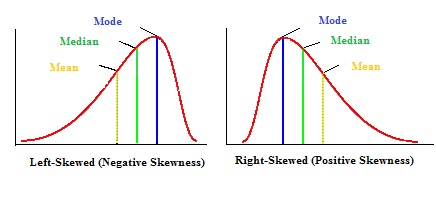

In [ ]:
df["fare"].skew() # 양수 왼쪽으로 치우져짐

4.367709134122922

- 상관계수
    - 칼 피어슨(Karl Pearson)이 개발한 상관계수
    - 두개의 수치형 변수의 변화가 연관되는 정도
    - +1 ~ -1 사이의 값을 가짐
    - +1 의 가까울수록 양의 상관관계
    - -1 의 가까울수록 음의 상관관계
    - 0 에 가까울수록 상관관계 X

In [ ]:
cols = ["survived","age","sibsp","parch","fare"]

df[cols].corr()

,survived,age,sibsp,parch,fare
survived,1.000000,-0.053695,0.002370,0.108919,0.233622
age,-0.053695,1.000000,-0.243699,-0.150917,0.178740
sibsp,0.002370,-0.243699,1.000000,0.373587,0.160238
parch,0.108919,-0.150917,0.373587,1.000000,0.221539
fare,0.233622,0.178740,0.160238,0.221539,1.000000


# 범주형 데이터 분석하기

- 고유값 개수보기

In [ ]:
df["embarked"].nunique() #원핫인코딩

3

- 고유값들 보기

In [ ]:
df["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

- 최빈값

In [ ]:
df["embarked"].mode()

0    S
dtype: object

- 범주별 개수 보기

In [ ]:
df["embarked"].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [ ]:
df["embarked"].value_counts(normalize=True)

S    0.699311
C    0.206580
Q    0.094109
Name: embarked, dtype: float64

In [ ]:
df["cabin"].nunique()

186

In [ ]:
df["cabin"].value_counts().tail(50)

C99      1
B94      1
C87      1
A31      1
B80      1
B4       1
A32      1
C49      1
A7       1
B19      1
B86      1
D47      1
F E69    1
C110     1
A5       1
B30      1
A6       1
D56      1
C103     1
C82      1
E10      1
C104     1
A10      1
C45      1
C90      1
D49      1
E58      1
D48      1
A26      1
B50      1
A23      1
D9       1
D50      1
A20      1
E68      1
A16      1
C111     1
C70      1
B38      1
C95      1
B73      1
D46      1
B79      1
C30      1
B37      1
A14      1
E63      1
E12      1
E38      1
C105     1
Name: cabin, dtype: int64

In [ ]:
df.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 두 범주형 간에 관계보기

In [ ]:
pd.crosstab(df["gender"],df["survived"],margins = True) # survived 열


survived,0,1,All
gender,,,
female,81,385,466
male,734,109,843
All,815,494,1309


In [ ]:
pd.crosstab(df["gender"],df["survived"],margins=True, normalize="index") # columns 로 주면 세로로 나옴

survived,0,1
gender,,
female,0.173820,0.826180
male,0.870700,0.129300
All,0.622613,0.377387


In [ ]:
pd.crosstab(df["pclass"],df["survived"],margins=True, normalize="index")

survived,0,1
pclass,,
1,0.424149,0.575851
2,0.577617,0.422383
3,0.730606,0.269394
All,0.622613,0.377387


In [ ]:
pd.crosstab(df["parch"],df["survived"],margins=True,normalize="index")

survived,0,1
parch,,
0,0.668663,0.331337
1,0.452941,0.547059
2,0.469027,0.530973
3,0.375000,0.625000
4,0.666667,0.333333
5,0.833333,0.166667
6,1.000000,0.000000
9,0.500000,0.500000
All,0.622613,0.377387


In [ ]:
pd.crosstab(df["embarked"],df["pclass"],normalize="columns")

pclass,1,2,3
embarked,,,
C,0.439252,0.101083,0.142454
Q,0.009346,0.025271,0.159379
S,0.551402,0.873646,0.698166
